<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>    
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd

## Step 2. Import the dataset

In [3]:
data = pd.read_csv('50_Startups.csv')

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 3 . Check the State Column

In [23]:
data.groupby('State').size()

State
California    17
Florida       16
New York      17
dtype: int64

## Step 4 . Splitting dataset in to input and output

In [68]:
X = data.drop(['Profit'] , axis=1)
y = data['Profit']


## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [122]:
X = pd.get_dummies(X , columns=['State'] , drop_first=True)

In [124]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


## Step 6 . Dummy variable trap

In [127]:
# Already Performed using | drop_first =True

## Step 7 Splitting dataset in to Train and Test

In [130]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X_train.shape)
print(X_test.shape)

(40, 5)
(10, 5)


## Step 8  Import LinearRegression model from linear_model family 

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Step 9  Fit the data

In [136]:
model.fit(X_train , y_train)

LinearRegression()

## Step 10  Predict the data

In [138]:
y_pred = model.predict(X_test)

## Step 11  Display Result

In [142]:
y_pred

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

In [144]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [152]:
import matplotlib.pyplot as plt

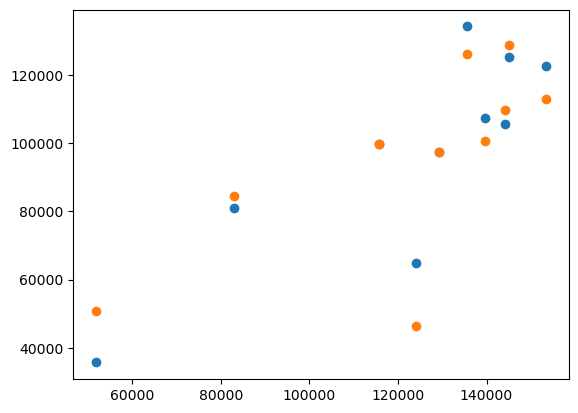

In [158]:
plt.scatter(X_test['Administration'] , y_test)
plt.scatter(X_test['Administration'] , y_pred)

In [150]:
# from sklearn.metrics import accuracy_score
# print("Accuracy:", accuracy_score(y_test, y_pred))

## RSS

In [160]:
import numpy as np 

In [162]:
np.sum((y_test.values - y_pred)**2)

820103630.4430106

In [164]:
len(y_test)

10

In [168]:
from sklearn.metrics import mean_squared_error

In [170]:
mean_squared_error(y_test.values , y_pred) * len(y_pred)

820103630.4430106

## R Square

In [180]:
from sklearn.metrics import r2_score

In [187]:
print("Accuracy : ", r2_score(y_test , y_pred) * 100)

Accuracy :  89.87266414328636


## Now use Polynomial Regression on Position_Salaries dataset

In [193]:
data2 = pd.read_csv('Position_Salaries.csv')
data2.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


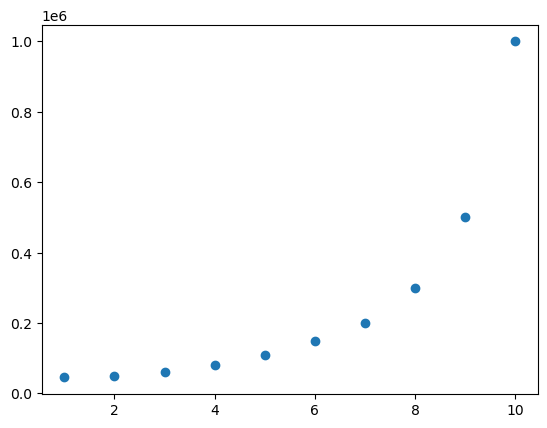

In [195]:
plt.scatter(data2['Level'] , data2['Salary'])

In [248]:
X = data2.iloc[::,1:2:]
y = data2['Salary']

In [250]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [252]:
X_train

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [254]:
from sklearn.preprocessing import PolynomialFeatures

In [311]:
poly = PolynomialFeatures(degree=2)

In [313]:
x1 = poly.fit_transform(X_train)
x1

array([[  1.,   6.,  36.],
       [  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [315]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [317]:
model1.fit(x1 , y_train)

LinearRegression()

In [319]:
pred = model1.predict(poly.fit_transform(X_test))

In [321]:
pred

array([653243.00452233,  38027.48728095])

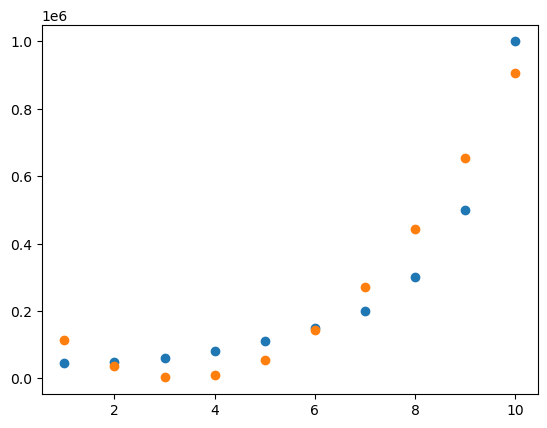

In [323]:
plt.scatter(data2['Level'] , data2['Salary'])
plt.scatter(data2['Level'] , model1.predict(poly.fit_transform(X)))